In [37]:
%matplotlib inline

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

# preprocessing

In [39]:
sns.set(rc={'figure.figsize': (9, 6)})

In [40]:
data = pd.read_csv('event_data_train.csv')
data.head(15)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   step_id    int64 
 1   timestamp  int64 
 2   action     object
 3   user_id    int64 
dtypes: int64(3), object(1)
memory usage: 106.2+ MB


In [42]:
data['date'] = pd.to_datetime(data.timestamp, unit='s')

In [43]:
data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [44]:
data.groupby('step_id', as_index=False).step_id.agg({'count_step_id': 'count'}) \
    .sort_values(by='count_step_id', ascending=False).reset_index()

,index,step_id,count_step_id
0,60,32927,60553
1,58,32815,51189
2,64,32950,50847
3,56,32812,48570
4,61,32929,46478
...,...,...,...
193,159,33914,6530
194,191,34051,6314
195,189,34049,6307
196,192,34052,6159


In [45]:
data.groupby(['user_id', 'step_id'], as_index=False).agg(num_steps=('step_id', 'count')) \
    .sort_values(by='num_steps', ascending=True)

,user_id,step_id,num_steps
353182,13606,31972,1
64132,2311,31978,1
64133,2311,32219,1
64134,2311,120745,1
513083,19847,32174,1
...,...,...,...
539522,20907,32202,523
539610,20907,33675,531
539542,20907,32950,546
344565,13268,31977,563


In [46]:
data.groupby('action', as_index=False).agg(num_step_id=('step_id',  'count'))

,action,num_step_id
0,discovered,689495
1,passed,650331
2,started_attempt,310047
3,viewed,1830830


In [47]:
data['day'] = data.date.dt.date
data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [48]:
data.resample('3M', on='date').agg({'action': 'count'})

,action
date,
2015-06-30,293168
2015-09-30,437304
2015-12-31,159275
2016-03-31,174111
2016-06-30,151865
2016-09-30,240816
2016-12-31,267220
2017-03-31,256299
2017-06-30,293002


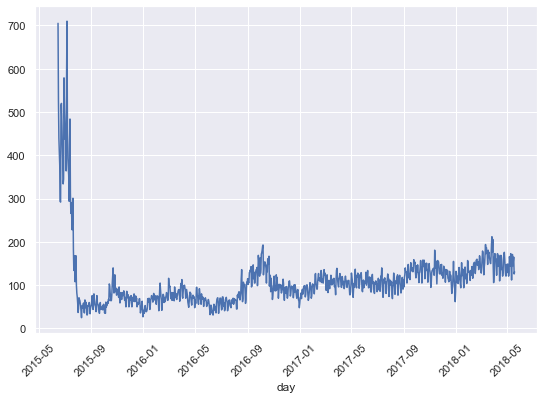

In [49]:
data.groupby('day') \
    .user_id.nunique().plot()
plt.xticks(rotation=45); # Rotates X-Axis Ticks by 45-degrees


<AxesSubplot:>

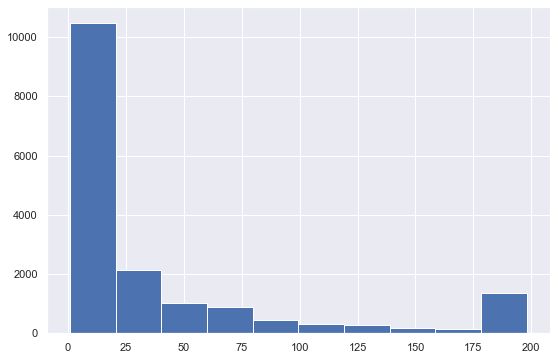

In [50]:
data.query('action == "passed"') \
    .groupby('user_id', as_index=False) \
    .agg(passed_step=('step_id', 'count')) \
    .passed_step.hist()

In [51]:
users_event_data = \
data.pivot_table(index='user_id', 
                 columns='action', 
                 values='step_id',
                 aggfunc='count',
                 fill_value=0) \
    .reset_index()

In [52]:
users_event_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


## submission data

In [53]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [54]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [55]:
tries = \
submissions_data.groupby(['user_id', 'step_id'], as_index=False) \
                .agg(num_attempts=('submission_status', 'count')) \
                .sort_values('num_attempts', ascending=False)

tries.query('num_attempts >= 0') \
     .groupby('step_id', as_index=False) \
     .agg(high_step_fails=('num_attempts', 'sum')) \
     .sort_values('high_step_fails', ascending=False)

,step_id,high_step_fails
4,31978,22178
11,32031,18221
19,32202,16950
1,31972,15394
12,32075,14534
...,...,...
67,33874,2319
23,32763,2301
70,33984,2286
59,33681,2280


In [56]:
data.groupby('step_id').user_id.count()

step_id
30456     22768
30462     12069
30465      9870
31955     31882
31956     34336
          ...  
109765     4152
120744    19619
120745    27517
158432    11683
158433     9097
Name: user_id, Length: 198, dtype: int64

In [57]:
submissions_data.groupby('step_id').user_id.count()

step_id
31971     13150
31972     15394
31976     12517
31977     13257
31978     22178
          ...  
33992      3432
33994      3473
33998      2326
34041      2773
120745     5815
Name: user_id, Length: 76, dtype: int64

In [58]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [59]:
users_scores = \
submissions_data.pivot_table(values='step_id', 
                             index='user_id',
                             columns='submission_status',
                             aggfunc='count') \
                .fillna(0).reset_index()

## drop-out users

In [60]:
data = data.rename_axis(None, axis=1)

In [61]:
gap_df = data[['user_id', 'day', 'timestamp']]

In [62]:
gap_data = gap_df.drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.agg(list).apply(np.diff).values

In [63]:
gap_data_days = pd.Series(np.concatenate(gap_data, axis=0) / (24 * 60 * 60))

<AxesSubplot:>

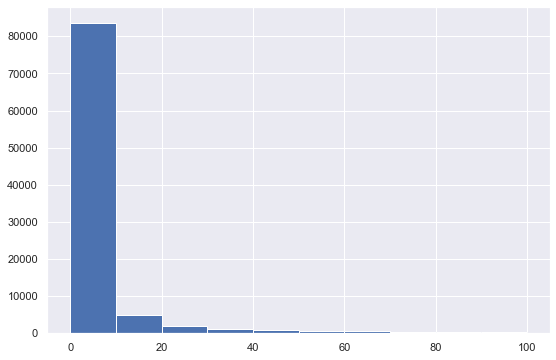

In [64]:
gap_data_days[gap_data_days < 100].hist()

In [65]:
gap_data_days.quantile(0.95)

59.760440972222156

In [66]:
users_data = \
data.groupby('user_id', as_index=False) \
    .agg(last_timestamp=('timestamp', 'max'))

In [67]:
max_gap = datetime.timedelta(days=30).total_seconds()

In [68]:
users_data['is_gone_user'] = data.timestamp.max() - users_data.last_timestamp > max_gap

In [69]:
data.timestamp.max()

1526772811

In [70]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [71]:
users_data = users_data.merge(users_scores, how='outer').fillna(0)
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [72]:
users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [73]:
users_data = users_data.merge(users_event_data, on='user_id', how='outer')
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [74]:
users_days = data.groupby('user_id', as_index=False).day.nunique().sort_values(by='day')

In [75]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [76]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [77]:
users_data['passed_course'] = users_data.passed > 170
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [78]:
users_data.passed_course.sum()

1425

# Merge

In [79]:
test = data.head(2)

In [80]:
test.merge(test, how='outer')

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15


# Karpov id

### event data

In [81]:
data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [82]:
users_finished = \
data.query('action == "passed"') \
    .groupby(['user_id'], as_index=False) \
    .agg(passed_action=('action', 'count')).sort_values(by='passed_action', ascending=False)

users_finished = users_finished.query('passed_action == 198')

In [83]:
users_finished.query('user_id == 19805')

,user_id,passed_action
12757,19805,198


In [84]:
data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [85]:
users_finished.user_id.values.shape

(394,)

In [86]:
passed_data = \
data[data['user_id'].isin(users_finished.user_id.values)]

In [87]:
passed_data

,step_id,timestamp,action,user_id,date,day
505,32815,1434344946,discovered,11670,2015-06-15 05:09:06,2015-06-15
506,32815,1434344946,passed,11670,2015-06-15 05:09:06,2015-06-15
507,32815,1434344946,viewed,11670,2015-06-15 05:09:06,2015-06-15
508,32811,1434344952,discovered,11670,2015-06-15 05:09:12,2015-06-15
509,32811,1434344952,viewed,11670,2015-06-15 05:09:12,2015-06-15
...,...,...,...,...,...,...
3479638,34026,1526756031,viewed,23194,2018-05-19 18:53:51,2018-05-19
3479642,34026,1526756104,viewed,23194,2018-05-19 18:55:04,2018-05-19
3479644,33901,1526756106,viewed,23194,2018-05-19 18:55:06,2018-05-19
3479652,33901,1526756195,viewed,23194,2018-05-19 18:56:35,2018-05-19


In [88]:
users_min_max = \
passed_data.groupby('user_id').agg(min_stamp=('timestamp', 'min'), max_stamp=('timestamp', 'max'))

In [89]:
users_min_max

,min_stamp,max_stamp
user_id,,
22,1498561010,1507142631
30,1467307716,1510574287
39,1456943480,1502712399
80,1469080119,1489798576
149,1513511240,1524591350
...,...,...
26270,1479924874,1490548403
26304,1518782324,1520247170
26610,1493838797,1523209444


In [90]:
users_min_max['delta'] = (users_min_max.max_stamp - users_min_max.min_stamp) / 3600 / 24

In [91]:
data.groupby('user_id').agg({'day': 'nunique'}).idxmax()

day    1046
dtype: int64

In [92]:
submissions_data.groupby('user_id').agg({'day': 'nunique'}).sort_values(by='day')

,day
user_id,
2,1
13917,1
13913,1
13906,1
13905,1
...,...
17825,50
3572,51
6662,51


In [93]:
data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [94]:
data['year_month'] = data.date.dt.to_period('M')

In [95]:
data.drop_duplicates(subset=['user_id', 'year_month']) \
    .groupby('user_id').agg(appear=('year_month', 'count')) \
    .sort_values(by='appear', ascending=False)

,appear
user_id,
1046,36
1078,28
21969,24
7596,21
24752,20
...,...
10791,1
10797,1
10799,1


### subm data

In [96]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [97]:
submissions_data.step_id.nunique()

76

In [98]:
corr_subm = \
submissions_data.query('submission_status == "correct"') \
    .drop_duplicates(subset=['user_id', 'step_id']) \
    .groupby(['user_id'], as_index=False) \
    .agg(cor_sub=('submission_status', 'count')) \
    .query('cor_sub == 76')
corr_subm

,user_id,cor_sub
4,16,76
5,22,76
8,30,76
13,39,76
21,60,76
...,...,...
9724,26617,76
9725,26619,76
9750,26697,76
9783,26779,76


In [99]:
passed_data = \
submissions_data[submissions_data['user_id'].isin(corr_subm.user_id.values)]

In [100]:
users_min_max = \
passed_data.groupby('user_id').agg(min_stamp=('timestamp', 'min'), max_stamp=('timestamp', 'max'))

In [101]:
users_min_max['delta'] = (users_min_max.max_stamp - users_min_max.min_stamp) / 3600

In [102]:
users_min_max.sort_values(by='delta')

,min_stamp,max_stamp,delta
user_id,,,
19805,1509741306,1509744516,0.891667
6203,1492678635,1492726715,13.355556
1074,1515937849,1516132014,53.934722
10923,1510578872,1510814460,65.441111
21321,1475438525,1475698459,72.203889
...,...,...,...
2444,1437679998,1516002956,21756.377222
25398,1434820974,1513261066,21788.914444
12839,1434386649,1518722110,23426.516944


In [103]:
corr_subm.query('user_id == 19805')

,user_id,cor_sub
7250,19805,76


In [104]:
sub = submissions_data.copy()

In [105]:
new_df = sub.pivot_table(index='user_id', columns='submission_status',values='step_id', aggfunc='count')
new_df[new_df['correct'] == new_df['correct'].max()]

submission_status,correct,wrong
user_id,,
1046,421.0,513.0


In [106]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


## Module 2.10

In [107]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [108]:
users_data.describe()

,user_id,last_timestamp,correct,wrong,discovered,passed,started_attempt,viewed,day
count,19234.000000,1.923400e+04,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000,19234.000000
mean,13363.573672,1.484763e+09,11.578715,14.890246,35.847718,33.811532,16.119736,95.187169,6.088489
std,7750.057260,3.067006e+07,22.028195,40.641154,56.576201,54.932368,31.249011,346.323327,12.341683
min,1.000000,1.434344e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6636.500000,1.456749e+09,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,13358.000000,1.488534e+09,1.000000,0.000000,9.000000,8.000000,2.000000,12.000000,1.000000
75%,20073.750000,1.513462e+09,10.000000,10.000000,42.000000,39.000000,15.000000,89.000000,6.000000
max,26798.000000,1.526773e+09,421.000000,1001.000000,198.000000,198.000000,721.000000,32778.000000,478.000000


In [109]:
users_data[users_data.passed_course].day.median()

20.0

<AxesSubplot:>

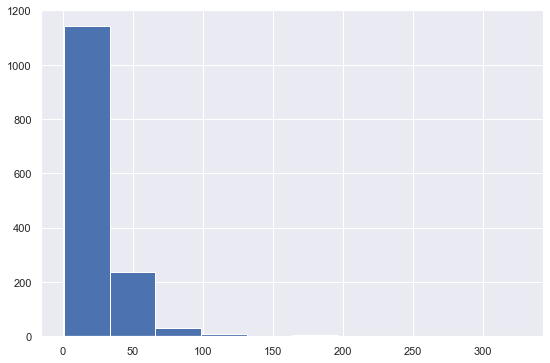

In [110]:
users_data[users_data.passed_course].day.hist()

In [111]:
events_data = data

In [112]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,year_month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015-06
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015-06
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015-06
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015-06
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015-06


In [113]:
user_min_time = events_data.groupby('user_id', as_index=False).agg(min_timestamp=('timestamp', 'min'))

In [114]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [115]:
users_data = users_data.merge(user_min_time, how='outer')

In [116]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [117]:
treshold = 3*24*60*60

In [118]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,year_month
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015-06
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015-06
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015-06
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015-06
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015-06


In [119]:
users_data.user_id.count()

19234

In [120]:
events_data.user_id.nunique()

19234

In [121]:
events_data.merge(user_min_time, how='outer')

,step_id,timestamp,action,user_id,date,day,year_month,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015-06,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015-06,1434340848
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,2018-05,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,2018-05,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018-05,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018-05,1526772750


In [122]:
event_data_train = events_data.merge(user_min_time, how='outer').query('timestamp < min_timestamp + @treshold')

In [123]:
event_data_train

,step_id,timestamp,action,user_id,date,day,year_month,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,2015-06,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,2015-06,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,2015-06,1434340848
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,2018-05,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,2018-05,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,2018-05,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,2018-05,1526772750


In [154]:
event_data_train.groupby('user_id').day.nunique().max()

4

In [155]:
submissions_data = submissions_data.merge(user_min_time, on='user_id', how='left')
submissions_data['users_time'] = submissions_data['timestamp'] - submissions_data['min_timestamp']
submissions_data_train = submissions_data[submissions_data.users_time <= 3*24*60*60]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [166]:
X = submissions_data_train.groupby('user_id', as_index=False).day.nunique().rename(columns={'day': 'days'})
X

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [167]:
steps_tried = submissions_data_train.groupby('user_id', as_index=False).agg(steps_tried=('step_id', 'nunique'))
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [168]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [169]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [170]:
submissions_data_train.pivot_table(values='step_id', 
                             index='user_id',
                             columns='submission_status',
                             aggfunc='count') \
                .fillna(0).reset_index()

submission_status,user_id,correct,wrong
0,2,2.0,0.0
1,3,4.0,4.0
2,8,9.0,21.0
3,14,0.0,1.0
4,16,23.0,27.0
...,...,...,...
8908,26787,3.0,0.0
8909,26790,1.0,0.0
8910,26794,31.0,9.0
8911,26797,2.0,0.0


## Evil step

In [124]:
events_train = pd.read_csv('event_data_train.csv')
events_train.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [125]:
events_train.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [126]:
events_train.user_id.nunique()

19234

In [127]:
events_train.describe()

,step_id,timestamp,user_id
count,3.480703e+06,3.480703e+06,3.480703e+06
mean,3.487358e+04,1.480288e+09,1.331468e+04
std,1.422243e+04,3.068906e+07,7.779099e+03
min,3.045600e+04,1.434341e+09,1.000000e+00
25%,3.217900e+04,1.450271e+09,6.642000e+03
50%,3.292900e+04,1.483904e+09,1.320800e+04
75%,3.348100e+04,1.507889e+09,2.014400e+04
max,1.584330e+05,1.526773e+09,2.679800e+04


In [128]:
submissions_data_train = pd.read_csv('submissions_data_train.csv')
submissions_data_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [129]:
submissions_data_train.user_id.nunique()

9940

In [130]:
submissions_data_train.describe()

,step_id,timestamp,user_id
count,509104.000000,5.091040e+05,509104.000000
mean,33732.591433,1.480582e+09,13198.874945
std,9379.377465,3.097267e+07,7820.240678
min,31971.000000,1.434341e+09,2.000000
25%,32031.000000,1.449950e+09,6431.000000
50%,32763.000000,1.484339e+09,13082.000000
75%,33481.000000,1.508326e+09,19985.000000
max,120745.000000,1.526771e+09,26798.000000


In [131]:
events_train.query('action == "passed"')

,step_id,timestamp,action,user_id
1,32815,1434340848,passed,17632
5,32811,1434340895,passed,17632
9,32929,1434340944,passed,17632
12,32814,1434340950,passed,17632
16,32812,1434341039,passed,17632
...,...,...,...,...
3480679,32179,1526771246,passed,19410
3480680,32182,1526771250,passed,19410
3480692,33373,1526772469,passed,11677
3480696,33375,1526772685,passed,11677


In [132]:
events_train.query('action == "passed"').groupby(['step_id', 'user_id']).agg(min_time=('timestamp', 'min'))

min_time
step_id user_id            
30456   8        1480604155
        16       1436438051
        22       1499608337
        30       1471618363
        34       1500733181
...                     ...
158433  26737    1515707965
        26750    1486813596
        26781    1489697935
        26784    1486941116
        26794    1495382191

[650331 rows x 1 columns]

In [133]:
submissions_data_train.groupby('step_id').count()

,timestamp,submission_status,user_id
step_id,,,
31971,13150,13150,13150
31972,15394,15394,15394
31976,12517,12517,12517
31977,13257,13257,13257
31978,22178,22178,22178
...,...,...,...
33992,3432,3432,3432
33994,3473,3473,3473
33998,2326,2326,2326


In [134]:
submissions_data_train.query('submission_status == "wrong"')

,step_id,timestamp,submission_status,user_id
2,31972,1478852149,wrong,15853
4,31976,1434348123,wrong,15853
15,32031,1434363465,wrong,15853
33,32795,1434520465,wrong,15853
38,32812,1434346160,wrong,15853
...,...,...,...,...
509096,120745,1500154509,wrong,3310
509099,120745,1501946959,wrong,2615
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [135]:
submission_fails = submissions_data_train.query('submission_status == "wrong"') \
                   .groupby(['user_id', 'step_id'], as_index=False) \
                   .agg(max_wrong_timestamp=('timestamp', 'max'))
submission_fails

,user_id,step_id,max_wrong_timestamp
0,3,31977,1434359541
1,3,31983,1441488141
2,3,32031,1441443212
3,3,32075,1441452329
4,3,32173,1441445879
...,...,...,...
82971,26794,32173,1495308872
82972,26794,32202,1495379363
82973,26794,32244,1495528817
82974,26794,32810,1495524797


In [136]:
last_wrong = submissions_data_train.query('submission_status == "wrong"') \
                   .groupby('user_id', as_index=False) \
                   .agg(last_wrong_timestamp=('timestamp', 'max'))

In [137]:
submission_fails = submission_fails.merge(last_wrong, how='outer')

In [138]:
evil_step = submission_fails.query('max_wrong_timestamp == last_wrong_timestamp')

In [139]:
evil_step.groupby('step_id', as_index=False) \
         .agg(num_users=('user_id', 'count')) \
         .sort_values(by=['num_users'], ascending=False)

,step_id,num_users
28,32812,867
4,31978,697
53,33669,402
0,31971,305
1,31972,294
...,...,...
9,31988,10
55,33674,9
38,33413,9
43,33480,7


In [140]:
events_train.groupby('user_id', as_index=False)

In [141]:
last_times = submissions_data_train.groupby('user_id', as_index=False) \
                                   .agg(last_timestamp=('timestamp', 'max'))
last_times

,user_id,last_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601
...,...,...
9935,26787,1469015051
9936,26790,1451722691
9937,26794,1511374868
9938,26797,1508425828


In [142]:
sub_with_last = submissions_data_train.merge(last_times, how='inner')

In [143]:
last_step = sub_with_last.query('(timestamp == last_timestamp) & (submission_status == "wrong")')
last_step

,step_id,timestamp,submission_status,user_id,last_timestamp
1696,33025,1436094981,wrong,18175,1436094981
5588,32173,1435303058,wrong,6053,1435303058
5848,33669,1436431976,wrong,13793,1436431976
6184,33350,1490785375,wrong,19739,1490785375
7332,32202,1492184437,wrong,17578,1492184437
...,...,...,...,...,...
509088,120745,1490136174,wrong,5608,1490136174
509099,120745,1501946959,wrong,2615,1501946959
509101,120745,1506348153,wrong,15253,1506348153
509102,120745,1523035316,wrong,1424,1523035316


In [144]:
last_step.groupby('step_id').agg(num_users=('user_id', 'count')) \
                            .sort_values(by=['num_users'], ascending=False)

,num_users
step_id,
31978,154
32812,133
32031,97
32202,92
33481,78
...,...
33482,1
33686,1
33684,1


In [145]:
events_train

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


### evil step - other solutions

In [146]:
mask = events_train.groupby('user_id', as_index=False).agg(last_time=('timestamp', 'max'))
mask

,user_id,last_time
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [147]:
events_train.merge(mask, how='inner') \
            .query('(timestamp == last_time) & (action in ["discovered", "viewed", "started_attempt"])') \
            .groupby('step_id').agg(evil_step=('user_id', 'count')) \
            .sort_values(by=['evil_step'], ascending=False)

,evil_step
step_id,
32815,2372
32927,1553
32191,1402
32950,918
32816,825
...,...
33999,10
33681,10
33684,10


In [148]:
submissions_data_by_step = submissions_data \
    .pivot_table(values='timestamp', index=['user_id', 'step_id'], aggfunc = 'max', 
                 columns='submission_status', fill_value=0) \
    .reset_index()
submissions_data_by_step

submission_status,user_id,step_id,correct,wrong
0,2,32812,1514383485,0
1,2,32929,1514383420,0
2,3,31971,1441259266,0
3,3,31972,1441258743,0
4,3,31976,1441258564,0
...,...,...,...,...
220716,26794,120745,1495290798,0
220717,26797,32812,1508425828,0
220718,26797,32929,1508425367,0
220719,26798,32812,1520978070,1520978063


In [149]:
submissions_data \
    .pivot_table(values='timestamp', index=['user_id', 'step_id'], aggfunc = 'max', 
                 columns='submission_status', fill_value=0)

submission_status     correct       wrong
user_id step_id                          
2       32812      1514383485           0
        32929      1514383420           0
3       31971      1441259266           0
        31972      1441258743           0
        31976      1441258564           0
...                       ...         ...
26794   120745     1495290798           0
26797   32812      1508425828           0
        32929      1508425367           0
26798   32812      1520978070  1520978063
        32929      1520977976           0

[220721 rows x 2 columns]

In [150]:
pd \
    .pivot_table(submissions_data, values='timestamp', index=['user_id', 'step_id'], aggfunc = 'max', 
                 columns='submission_status', fill_value=0)

submission_status     correct       wrong
user_id step_id                          
2       32812      1514383485           0
        32929      1514383420           0
3       31971      1441259266           0
        31972      1441258743           0
        31976      1441258564           0
...                       ...         ...
26794   120745     1495290798           0
26797   32812      1508425828           0
        32929      1508425367           0
26798   32812      1520978070  1520978063
        32929      1520977976           0

[220721 rows x 2 columns]